In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/jaya/Documents/MY PROJECTS/ToyotaCorolla.csv")

In [3]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1436 non-null int64
KM           1436 non-null int64
FuelType     1436 non-null object
HP           1436 non-null int64
MetColor     1436 non-null int64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null int64
Weight       1436 non-null int64
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [5]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [6]:
df.isnull().values.any()

False

In [7]:
from sklearn.preprocessing import LabelEncoder
relabling = LabelEncoder()
df["NewFuelType"] = relabling.fit_transform(df["FuelType"].values)

In [8]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,NewFuelType
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,1
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,1
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,1
3,14950,26,48000,Diesel,90,0,0,2000,3,1165,1
4,13750,30,38500,Diesel,90,0,0,2000,3,1170,1


In [9]:
new_df = df.drop("FuelType",1)

In [10]:
new_df.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,NewFuelType
0,13500,23,46986,90,1,0,2000,3,1165,1
1,13750,23,72937,90,1,0,2000,3,1165,1
2,13950,24,41711,90,1,0,2000,3,1165,1
3,14950,26,48000,90,0,0,2000,3,1165,1
4,13750,30,38500,90,0,0,2000,3,1170,1


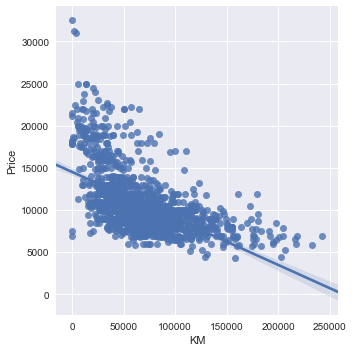

In [11]:
sns.lmplot("KM","Price",new_df)

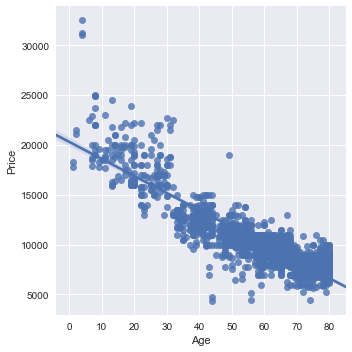

In [12]:
sns.lmplot("Age","Price",new_df)

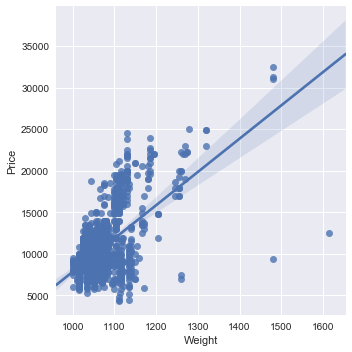

In [13]:
sns.lmplot("Weight","Price",new_df)

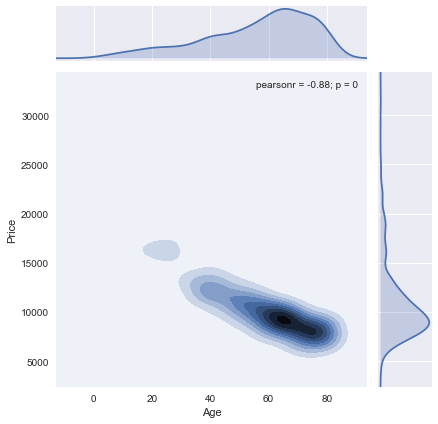

In [14]:
sns.jointplot("Age", "Price", new_df, kind='kde')

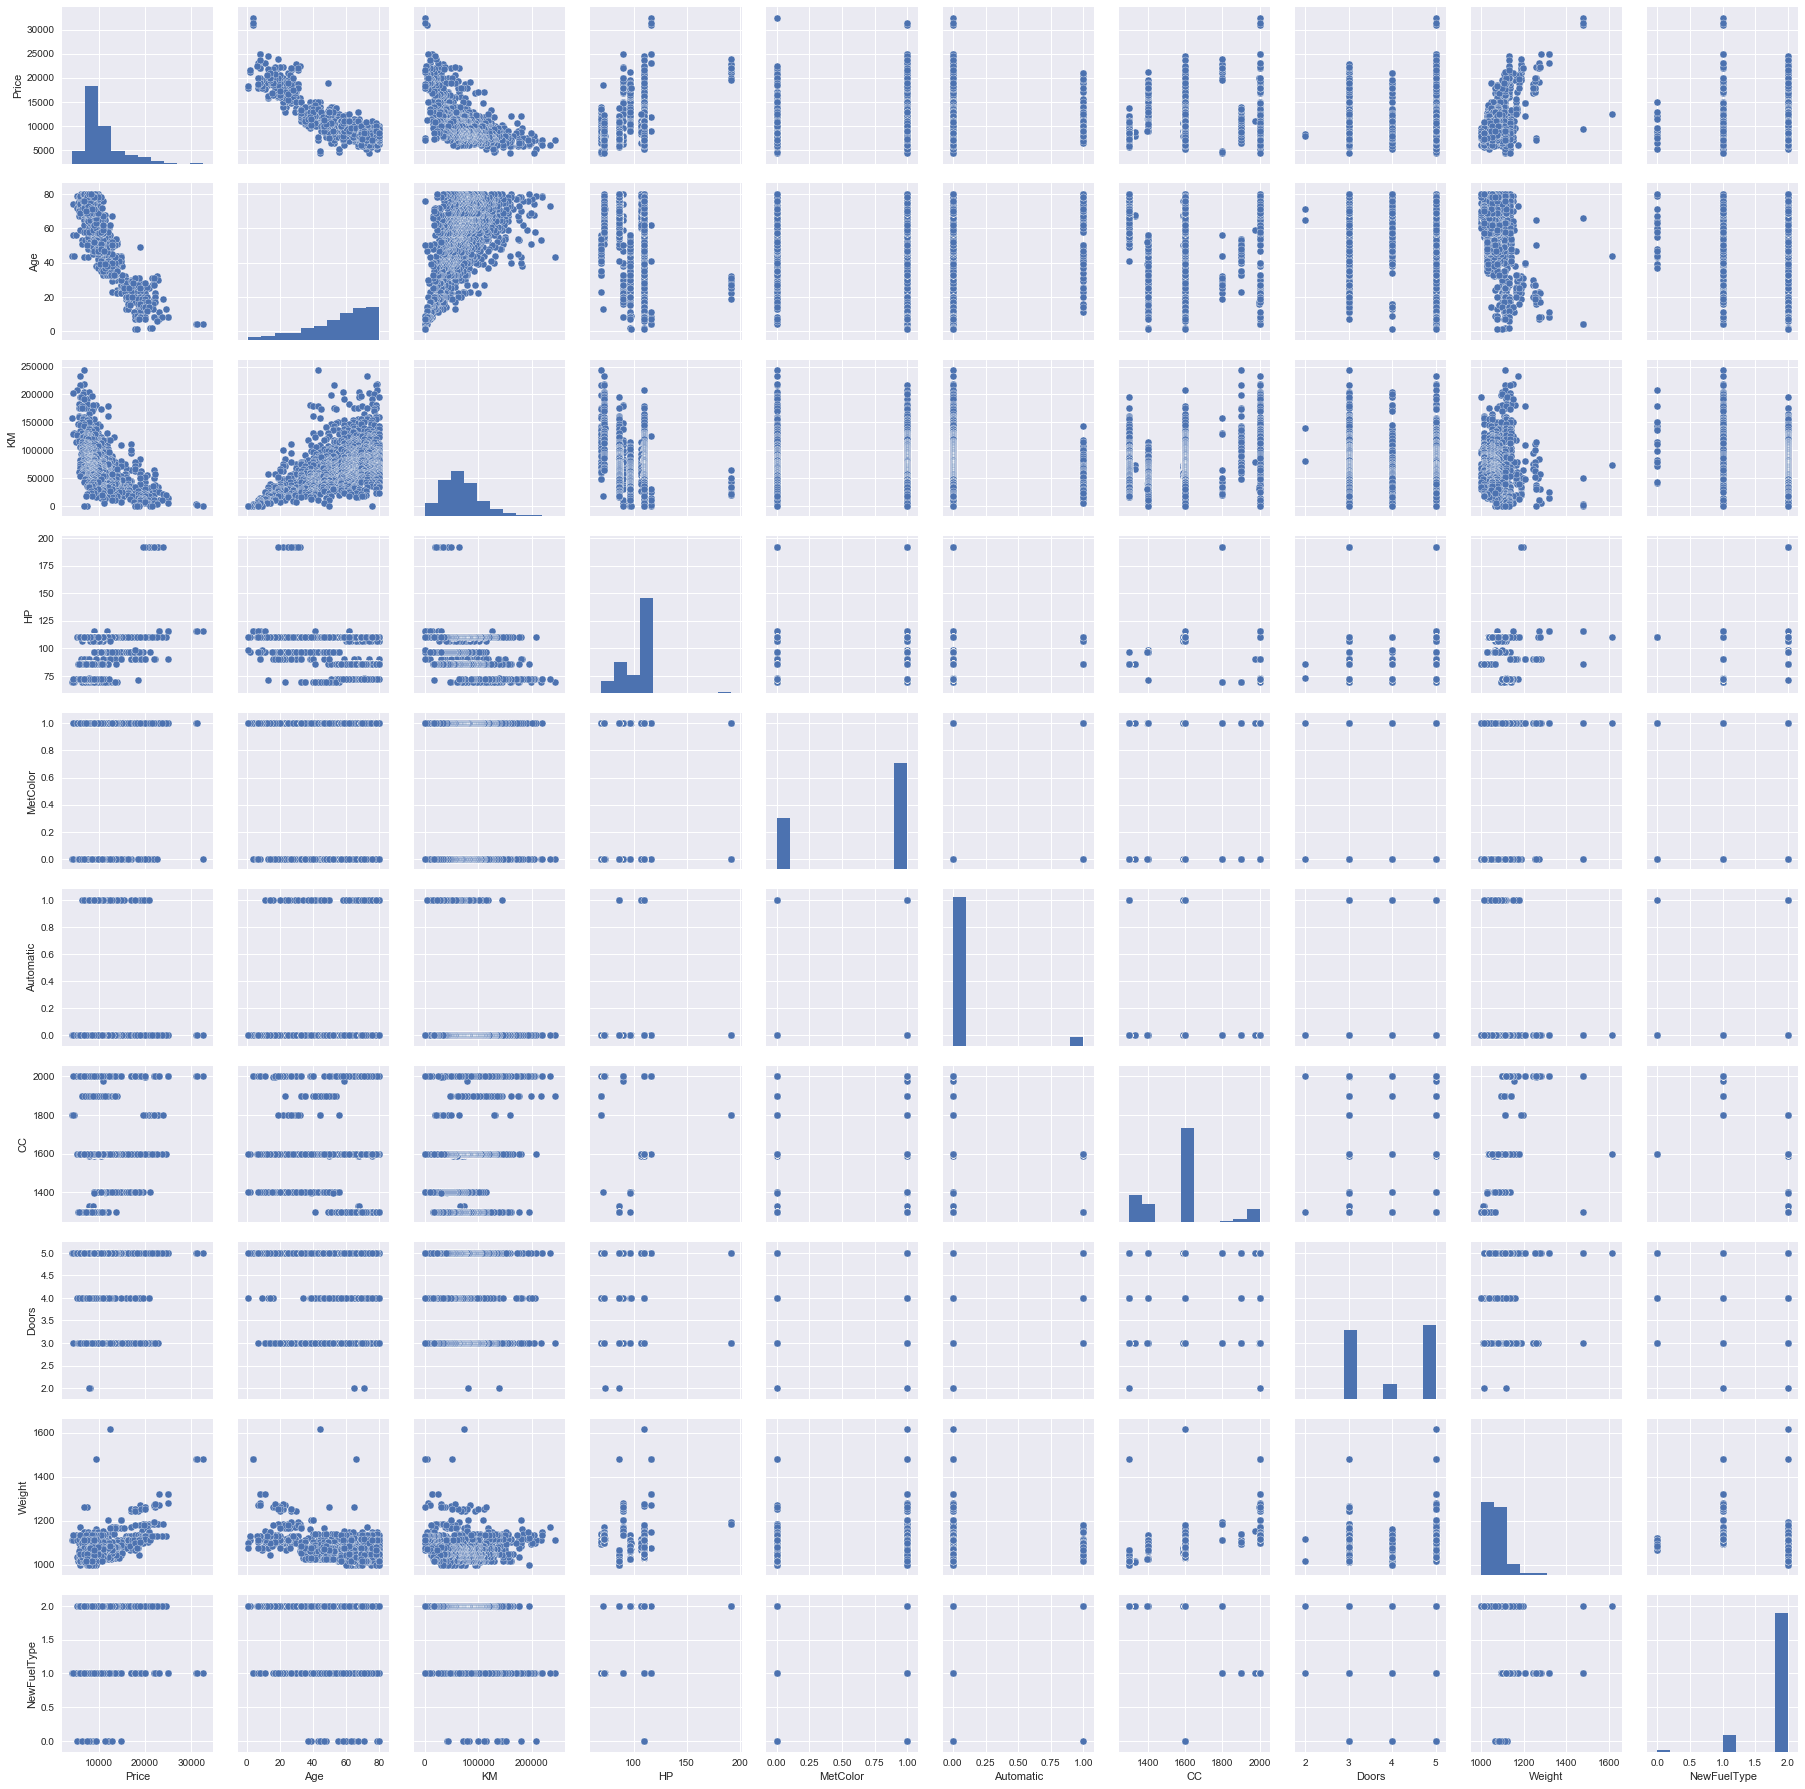

In [15]:
sns.pairplot(new_df)

In [16]:
X = new_df.drop("Price",1)
Y = new_df["Price"]

In [17]:
X.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,NewFuelType
0,23,46986,90,1,0,2000,3,1165,1
1,23,72937,90,1,0,2000,3,1165,1
2,24,41711,90,1,0,2000,3,1165,1
3,26,48000,90,0,0,2000,3,1165,1
4,30,38500,90,0,0,2000,3,1170,1


In [18]:
Y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()
linear_model = lm.fit(X_train, Y_train)

In [22]:
Y_pred = linear_model.predict(X_test)

In [23]:
Y_pred

array([  8136.6194337 ,   9424.76853748,  18611.16952644,   8407.69172937,
         8222.91265241,   8669.74035208,  15026.20001916,   9819.06067101,
         8359.39714595,   9534.99582477,  11710.54663259,  11006.80044637,
        12924.95239252,   5501.55039449,  11026.91051013,   8677.48615256,
         6537.58483895,  18436.07293565,   9164.98447916,   7881.41729088,
        12447.45178362,  10526.84311519,   7324.61397972,  15808.14145037,
        13962.10650144,  12376.38858867,  11908.0217265 ,   8704.93048367,
        10089.92351475,   9561.97326858,  19875.40221638,   9692.22381553,
        10826.47955399,  10327.21418963,   8204.47426659,  16304.89491359,
        16655.97570593,  10329.72777879,  13087.32546099,   7863.36996925,
         7652.94502678,  10820.63068373,  17661.55538765,   9545.64713207,
        13840.28259808,  11189.94875448,  10119.75468568,   8833.00952402,
        17504.63034746,  11004.88589528,  12770.06828672,   6247.42908491,
        11058.95535224,  

In [24]:
X_test

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,NewFuelType
1341,80,62581,110,0,0,1600,5,1075,2
828,68,68865,110,1,0,1600,3,1065,2
162,9,7650,110,1,0,1600,5,1115,2
614,64,150585,110,1,0,1600,3,1065,2
1357,76,60000,110,0,0,1600,3,1050,2
695,67,96000,110,1,0,1600,3,1050,2
19,30,64359,110,1,0,1600,3,1105,2
952,60,52487,110,1,0,1600,4,1035,2
1182,80,92255,107,0,1,1600,5,1105,2
864,68,64000,110,0,0,1600,5,1075,2


In [25]:
np.mean((Y_pred-Y_test)**2)

2009575.7009178724

In [26]:
lm.coef_

array([ -1.18690075e+02,  -1.82554712e-02,   2.41665640e+01,
         3.58139857e+01,   8.02781605e+01,  -1.42941155e+00,
        -9.75044802e+01,   2.52237366e+01,   2.68158643e+02])

In [27]:
lm.intercept_

-8761.3041624001726

In [28]:
lm.score(X_test,Y_test)

0.85784188834864994

In [29]:
lm.score(X_test,Y_pred)

1.0